In [1]:
from modules import * 
from modules.utils import *

In [2]:
X_train, X_test, y_train, y_test, scaler = load_and_preprocess_data(
    filename='Loan_Default_Cleaned.csv',
    target_column='Status'
)

In [3]:
def train_xgboost(X_train, y_train, X_test, y_test, handle_imbalance=None):
    
    if handle_imbalance == 'balanced':
       
        model = XGBClassifier(scale_pos_weight=(sum(y_train == 0) / sum(y_train == 1)))
        imbalance_label = "Class Weights"
        print("Using balanced class weights for XGBoost.")
    
    elif handle_imbalance == 'smote':
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
        model = XGBClassifier()
        X_train, y_train = X_train_resampled, y_train_resampled
        imbalance_label = "SMOTE"
        print("Using SMOTE for class imbalance in XGBoost.")
    
    else:
        model = XGBClassifier()
        imbalance_label = "No Weights"
        print("Training XGBoost without handling class imbalance.")
    
    
    model.fit(X_train, y_train)
    
    
    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)[:, 1]
    

    plot_confusion_matrix(y_test, y_pred, y_probs, model_name=f'XGBoost ({imbalance_label})')
    plot_roc_curve(y_test, y_probs, model_name=f'XGBoost ({imbalance_label})')
    
    return model, y_pred, y_probs


Training XGBoost without handling class imbalance.


<Figure size 640x480 with 0 Axes>

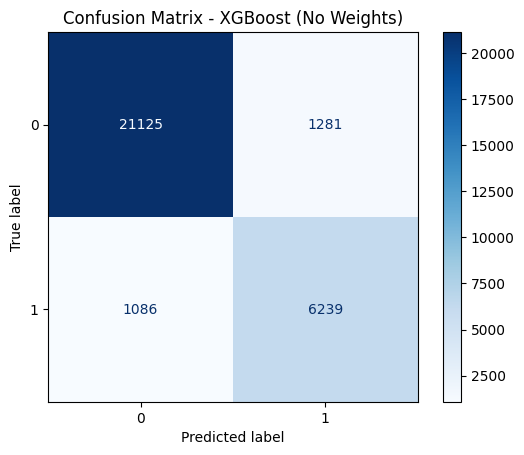

XGBoost (No Weights) Metrics:
Accuracy: 0.9204
Precision: 0.8297
Recall: 0.8517
F1 Score: 0.8406
ROC-AUC Score: 0.9797


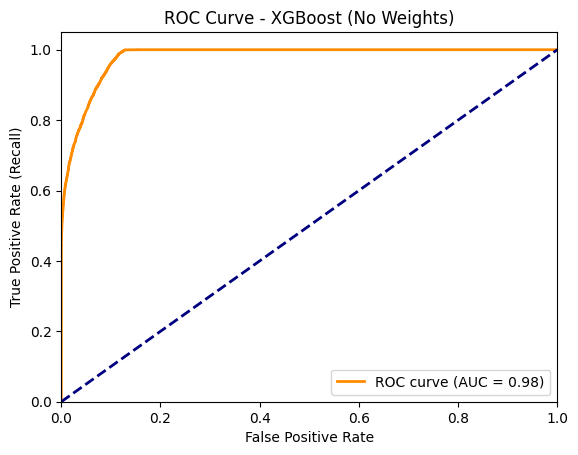

XGBoost (No Weights) ROC-AUC Score: 0.98
Using balanced class weights for XGBoost.


<Figure size 640x480 with 0 Axes>

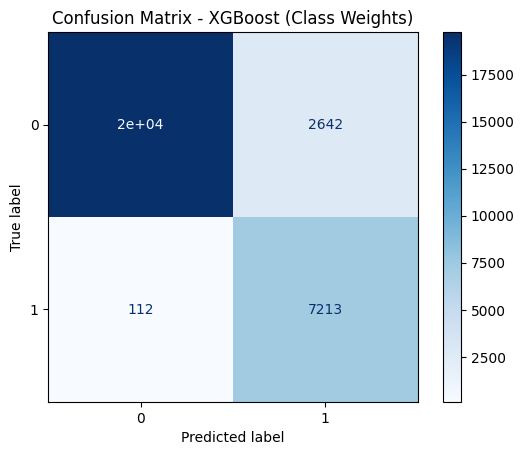

XGBoost (Class Weights) Metrics:
Accuracy: 0.9074
Precision: 0.7319
Recall: 0.9847
F1 Score: 0.8397
ROC-AUC Score: 0.9790


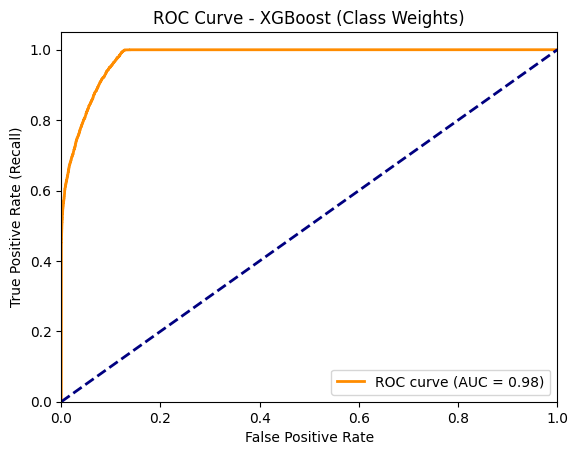

XGBoost (Class Weights) ROC-AUC Score: 0.98
Using SMOTE for class imbalance in XGBoost.


<Figure size 640x480 with 0 Axes>

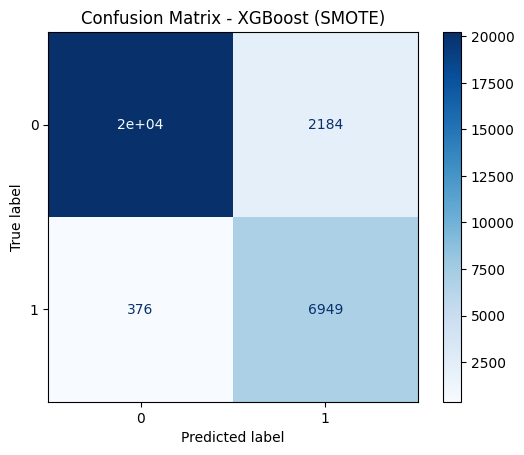

XGBoost (SMOTE) Metrics:
Accuracy: 0.9139
Precision: 0.7609
Recall: 0.9487
F1 Score: 0.8445
ROC-AUC Score: 0.9791


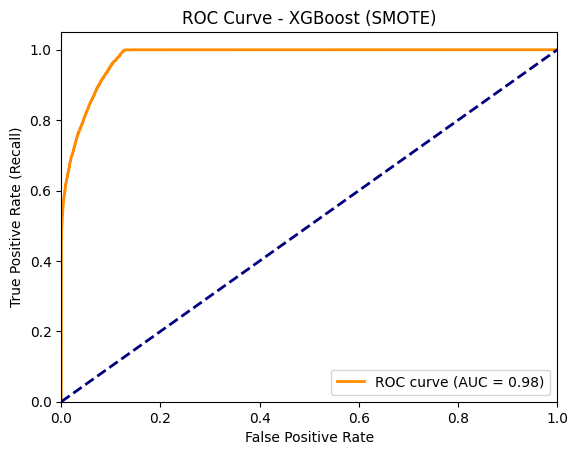

XGBoost (SMOTE) ROC-AUC Score: 0.98


(XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([4.3962328e-04, 8.2553037e-05, 2.4411263e-05, ..., 1.9899146e-05,
        1.5043007e-04, 1.3346652e-03], dtype=float32))

In [4]:
train_xgboost(X_train, y_train, X_test, y_test, handle_imbalance=None)

train_xgboost(X_train, y_train, X_test, y_test, handle_imbalance='balanced')

train_xgboost(X_train, y_train, X_test, y_test, handle_imbalance='smote')
